https://leetcode.com/problems/insert-into-a-binary-search-tree/description/

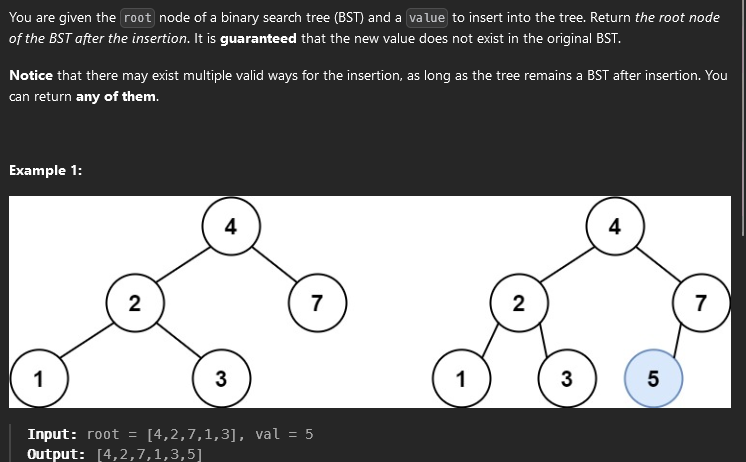

### **Understanding and Planning**
- Using a Binary Search Tree we need to traverse the tree until we find the correct node to attach the val to 
    1. Since we need to check whether a node is greater than or equal to the value of that node, before we check that nodes subtrees, we need to use PreOrder DFS
    2. We also need to find a leaf node before we insert the new node into the correct slot 
    3. input: the root node of a tree and a value to be inserted
       output: the root node of the tree


#### **Step By Step Breakdown**

1. compare value with root, if val is lesser traverse left subtree, else traverse right subtree

   ```
   def solution(root, val):
       if val <= root.val:
           solution(root.left, val)
       else:
           solution(root.right, val)

       return root
   ```

2. Need to traverse to a leaf node and insert new node past leaf node == Find None

   ```
   if not root: return Node(val)
   ```

3. Set this new node to the correct subtree

   ```
   root.left = solution(root.left, val)
   root.right = solution(root.right, val)
   ```

4. Final Solution

   ```
    def solution(root, val):
       if not root: return Node(val)

       if val <= root.val:
           root.left = solution(root.left, val)
       else:
           root.right = solution(root.right, val)

       return root
   ```


In [9]:
class Node:
    def __init__(self, val, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right


def list_to_bin_tree(l):
    if not l:
        return None

    root = Node(l.pop(0))
    queue = [root]

    while queue:
        node = queue.pop(0)

        if l:
            left_val = l.pop(0)
            if left_val != None:
                node.left = Node(left_val)
                queue.append(node.left)

        if l:
            right_val = l.pop(0)
            if right_val != None:
                node.right = Node(right_val)
                queue.append(node.right)

    return root

def bin_tree_to_list(root):
    l = []
    if not root:
        return l
    queue = [root]

    while queue:
        node = queue.pop(0)
        l.append(node.val)
        if node.left:
            queue.append(node.left)
        if node.right:
            queue.append(node.right)

    return l


def solution(root, val):
    # establish base case, return a node with the value if at a leaf node
    if not root:
        return Node(val)

    # if val is <= node.val then traverse left
    if val <= root.val:
        # traverse left subtree until leaf,
        # which will cause the base case to return a new node
        # and set that new node to the left subtree
        root.left = solution(root.left, val)

    # if val is > node.val then traverse right
    else:
        # traverse right subtree until leaf,
        # which will cause the base case to return a new node
        # and set that new node to the right subtree
        root.right = solution(root.right, val)

    return root


def test_solution():

    tests = [
        {"input": {"root": None, "val": 1}, "output": [1]},
        {"input": {"root": [2], "val": 1}, "output": [2, 1]},
        {"input": {"root": [4, 2, 7, 1, 3], "val": 5}, "output": [4, 2, 7, 1, 3, 5]},
    ]

    for i in range(len(tests)):
        print(
            "Test",
            i + 1,
            "Pass:",
            bin_tree_to_list(
            solution(
                list_to_bin_tree(tests[i]["input"]["root"]), tests[i]["input"]["val"]
            )
            )
            == tests[i]["output"],
        )

In [10]:
test_solution()

Test 1 Pass: True
Test 2 Pass: True
Test 3 Pass: False
Test 4 Pass: True
